In [2]:
import numpy as np
import seaborn as sns 


In [3]:
import torch 

matrix = torch.load('cos_sim_matrix.pt')

matrix

/home/donato/miniconda3/envs/ccmm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ 1.00000012e+00,  2.26719469e-01,  1.34806372e-02, ...,
        -1.98359601e-04,  3.09557654e-04,  2.56933942e-02],
       [ 2.26719469e-01,  1.00000024e+00,  1.06041476e-01, ...,
         4.90117185e-02,  4.98511642e-02,  4.44668159e-02],
       [ 1.34806372e-02,  1.06041476e-01,  9.99999702e-01, ...,
         2.02925369e-01,  2.15994716e-01,  1.78720593e-01],
       ...,
       [-1.98359601e-04,  4.90117185e-02,  2.02925369e-01, ...,
         9.99999940e-01,  9.77959752e-01,  5.97385287e-01],
       [ 3.09557188e-04,  4.98511717e-02,  2.15994716e-01, ...,
         9.77959752e-01,  9.99999940e-01,  6.28584802e-01],
       [ 2.56933980e-02,  4.44668345e-02,  1.78720623e-01, ...,
         5.97385287e-01,  6.28584802e-01,  9.99999940e-01]], dtype=float32)

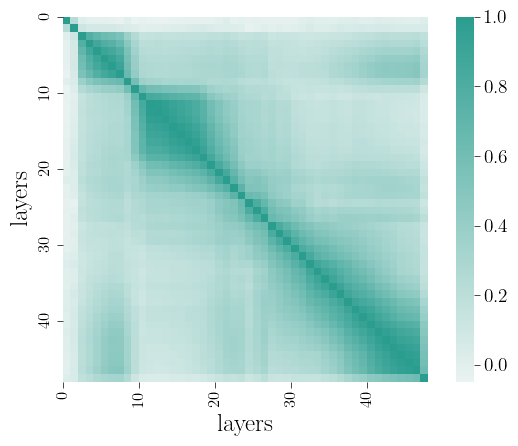

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "axes.titlesize": 24,  # Larger axes/title fonts
        "axes.labelsize": 24,
        "xtick.labelsize": 24,
        "ytick.labelsize": 20,
        "legend.fontsize": 24,
    }
)
sns.set_context("talk")


# suppose `matrix` is your array
im = sns.heatmap(
    matrix,
    cmap=sns.light_palette("#2A9D8F", as_cmap=True),
    cbar=False,
    square=True,
)

# add colorbar
cbar = im.figure.colorbar(im.collections[0])
cbar.ax.tick_params(labelsize=14)

# set ticks every 5
step = 10
xticks = np.arange(0, matrix.shape[1], step)
yticks = np.arange(0, matrix.shape[0], step)

im.set_xticks(xticks)
im.set_yticks(yticks)

# set tick labels as integers
im.set_xticklabels(xticks, rotation=90, fontsize=12)
im.set_yticklabels(yticks, fontsize=12)

# axis labels
im.set_xlabel("layers", fontsize=18)
im.set_ylabel("layers", fontsize=18)

for spine in cbar.ax.spines.values():
    spine.set_visible(False)

cbar.ax.tick_params(
    width=0.5,   # thickness of the ticks
    length=4,    # length of the ticks (optional, default is 6)
    labelsize=14
)

# thinner ticks on heatmap axes
im.tick_params(
    axis="both",    # apply to both x and y
    which="both",   # major and minor ticks
    width=0.5,      # thickness of tick lines
    length=4,       # length of tick marks
    labelsize=12    # size of tick labels
)

plt.tight_layout()

plt.savefig("cosine_similarity_matrix.pdf", dpi=300)